# 3.1: Evaluate the ROI of different marketing channels

## Loading libraries, reading in and filtering

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
file_id = '1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'purchases_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)

file_id = '1yZ7JH9qlsXBv4Fi7grzdYJKk6yXBrc0R'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'marketing.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS
From (redirected): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS&confirm=t&uuid=e845e8d5-af75-4de0-86c7-a72a291ea3b7
To: /content/purchases_final_PLEASE_TY.csv
100%|██████████| 272M/272M [00:05<00:00, 53.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yZ7JH9qlsXBv4Fi7grzdYJKk6yXBrc0R
To: /content/marketing.csv
100%|██████████| 263/263 [00:00<00:00, 492kB/s]


'marketing.csv'

In [ ]:
file_id = '1H695wq_TVs-x-7UNirY9--05aFb5MD-0'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'customers_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1H695wq_TVs-x-7UNirY9--05aFb5MD-0
To: /content/customers_final_PLEASE_TY.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 80.4MB/s]


'customers_final_PLEASE_TY.csv'

In [ ]:
purchases = pd.read_csv('purchases_final_PLEASE_TY.csv')
customers = pd.read_csv('customers_final_PLEASE_TY.csv')
marketing = pd.read_csv('marketing.csv')
purchases = purchases[purchases['Order Date'] < '2022-11-01']
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])
purchases['year'] = purchases['Order Date'].dt.year
purchases['day_of_year'] = purchases['Order Date'].dt.day_of_year

purchases

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping,year,day_of_year
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1,2018,338
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1,2018,356
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1,2018,358
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1,2018,359
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1,2018,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530758,2019-06-07,16.80,1,MA,Cosrx Galactomyces 95 Tone Balancing Essence 1...,B00OZE57XW,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.00,1,2019,158
1530759,2019-08-14,7.97,1,MA,Coppertone Limited Edition ULTRA GUARD SPF 70 ...,B001TKOHMM,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.10,1,2019,226
1530760,2019-09-30,6.68,1,MA,Greeks and Their Gods,0807057932,R_zfqnsBzlOAKibzb,Books,1,0.00,1,2019,273
1530761,2019-10-13,16.90,1,MA,"MIZON Snail Repair Cream, Face Moisturizer wit...",B00AF63QQE,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.00,1,2019,286


## Projected revenue increase based on suggested marketing strategies

In [ ]:
ctc_columns = ['Email CTC', 'Display Ad CTC', 'Video Ad CTC', 'Search Engine Ad CTC', 'Social Media Ad CTC']

# Find the column name with the maximum value for each row (customer)
customers['Highest CTC Channel'] = customers[ctc_columns].idxmax(axis=1)
customers['Total CTC'] = customers[ctc_columns].sum(axis=1)
customers['Highest CTC Channel'] = np.where(customers['Total CTC'] == 0, 'Email CTC', customers['Highest CTC Channel'])
Ad_distribution = customers.groupby('Highest CTC Channel').size()/len(customers)
total_cost = marketing['Cost'].sum()
total_revenue = marketing['Revenue'].sum()
Ad_cost = Ad_distribution*total_cost
Ad_cost = pd.DataFrame(Ad_cost, columns = ['Cost'])
#Ad_revenue = Ad_cost['Cost']*marketing['ROI']
final_revenue = 0
for i in range(len(Ad_cost)):
    final_revenue += Ad_cost['Cost'].iloc[i]*marketing['ROI'].iloc[i]

print(final_revenue)
print(total_revenue)
print(final_revenue/total_revenue)


Index(['Survey ResponseID', 'Prime', 'Free Trial', 'Email CTC',
       'Display Ad CTC', 'Video Ad CTC', 'Search Engine Ad CTC',
       'Social Media Ad CTC', 'Average CTC', 'Express Shipping',
       'Cart Abandonment Rate', 'Check Review', 'Refund rate', 'Time in Cart',
       'Time on Page', 'RFM', 'Recency_category', 'Frequency_category',
       'Monetary_category', 'Pct Discount', 'Category', 'Cat_Urgency',
       'Cat_Impulse', 'Cat_Indecisive', 'Cat_Category', 'Cat_Discount',
       'Cat_Engagement', 'Cat_High_Value_F', 'Cat_High_Value_M',
       'Highest CTC Channel', 'Total CTC'],
      dtype='object')
8344430.915479624
7346948.45
1.1357682679098726


## EDA

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

file_id = '1yZ7JH9qlsXBv4Fi7grzdYJKk6yXBrc0R'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'marketing.csv'
marketing = pd.read_csv('marketing.csv')

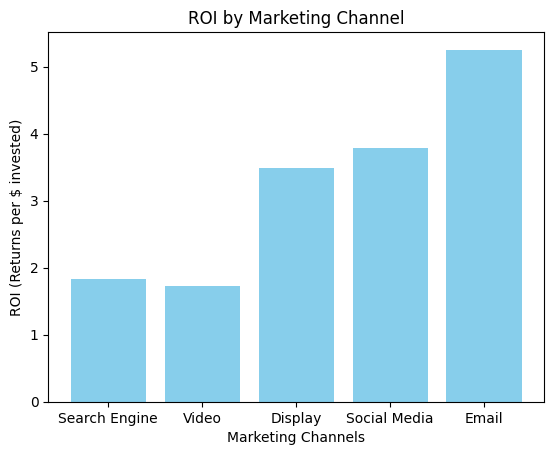

In [ ]:
custom_order = ['Search Engine', 'Video', 'Display', 'Social Media', 'Email']

df_custom_order = marketing.set_index('Ad Channel').loc[custom_order].reset_index()

plt.bar(df_custom_order['Ad Channel'], df_custom_order['ROI'], color='skyblue')
plt.xlabel('Marketing Channels')
plt.ylabel('ROI (Returns per $ invested)')
plt.title('ROI by Marketing Channel')
plt.show()

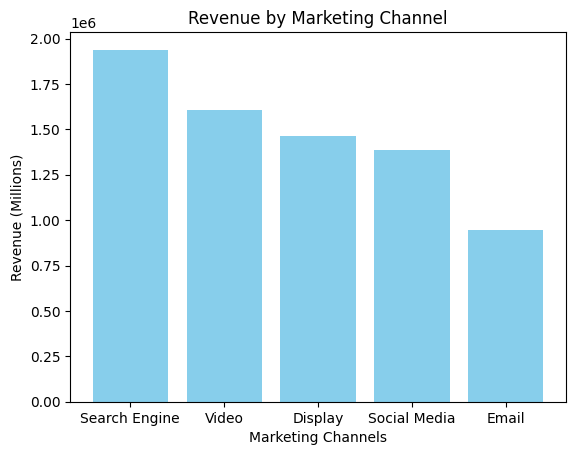

In [ ]:
marketing_sorted_rev = marketing.sort_values(by='Revenue', ascending=False)

plt.bar(marketing_sorted_rev['Ad Channel'], marketing_sorted_rev['Revenue'], color='skyblue')
plt.xlabel('Marketing Channels')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue by Marketing Channel')
plt.show()

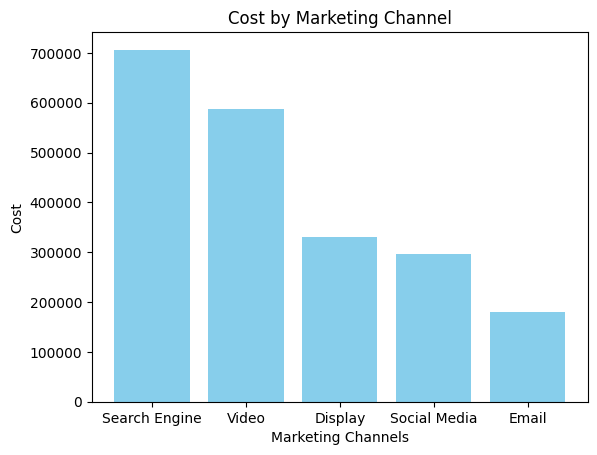

In [ ]:
marketing_sorted_cost = marketing.sort_values(by='Cost', ascending=False)

plt.bar(marketing_sorted_cost['Ad Channel'], marketing_sorted_cost['Cost'], color='skyblue')
plt.xlabel('Marketing Channels')
plt.ylabel('Cost')
plt.title('Cost by Marketing Channel')
plt.show()

# 3.2: Analyze the impact of various promotional campaigns on sales.

## Loading libraries, reading in and filtering

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
file_id = '1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'purchases_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)

file_id = '1yZ7JH9qlsXBv4Fi7grzdYJKk6yXBrc0R'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'marketing.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS
From (redirected): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS&confirm=t&uuid=06d9a860-d140-4b9d-8654-f7da62617d56
To: /content/purchases_final_PLEASE_TY.csv
100%|██████████| 272M/272M [00:01<00:00, 167MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yZ7JH9qlsXBv4Fi7grzdYJKk6yXBrc0R
To: /content/marketing.csv
100%|██████████| 263/263 [00:00<00:00, 592kB/s]


'marketing.csv'

In [ ]:
file_id = '1H695wq_TVs-x-7UNirY9--05aFb5MD-0'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'customers_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1H695wq_TVs-x-7UNirY9--05aFb5MD-0
To: /content/customers_final_PLEASE_TY.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 80.4MB/s]


'customers_final_PLEASE_TY.csv'

In [ ]:
purchases = pd.read_csv('purchases_final_PLEASE_TY.csv')
customers = pd.read_csv('customers_final_PLEASE_TY.csv')
marketing = pd.read_csv('marketing.csv')
purchases = purchases[purchases['Order Date'] < '2022-11-01']
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])
purchases['year'] = purchases['Order Date'].dt.year
purchases['day_of_year'] = purchases['Order Date'].dt.day_of_year

purchases

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping,year,day_of_year
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1,2018,338
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1,2018,356
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1,2018,358
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1,2018,359
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1,2018,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530758,2019-06-07,16.80,1,MA,Cosrx Galactomyces 95 Tone Balancing Essence 1...,B00OZE57XW,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.00,1,2019,158
1530759,2019-08-14,7.97,1,MA,Coppertone Limited Edition ULTRA GUARD SPF 70 ...,B001TKOHMM,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.10,1,2019,226
1530760,2019-09-30,6.68,1,MA,Greeks and Their Gods,0807057932,R_zfqnsBzlOAKibzb,Books,1,0.00,1,2019,273
1530761,2019-10-13,16.90,1,MA,"MIZON Snail Repair Cream, Face Moisturizer wit...",B00AF63QQE,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.00,1,2019,286


## Trends in total purchase amounts 2021

### January to April 2021

<ipython-input-12-5b363963b588>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_2021['Total Purchase Amount'] = purchases_2021['Purchase Price Per Unit'] * purchases_2021['Quantity']


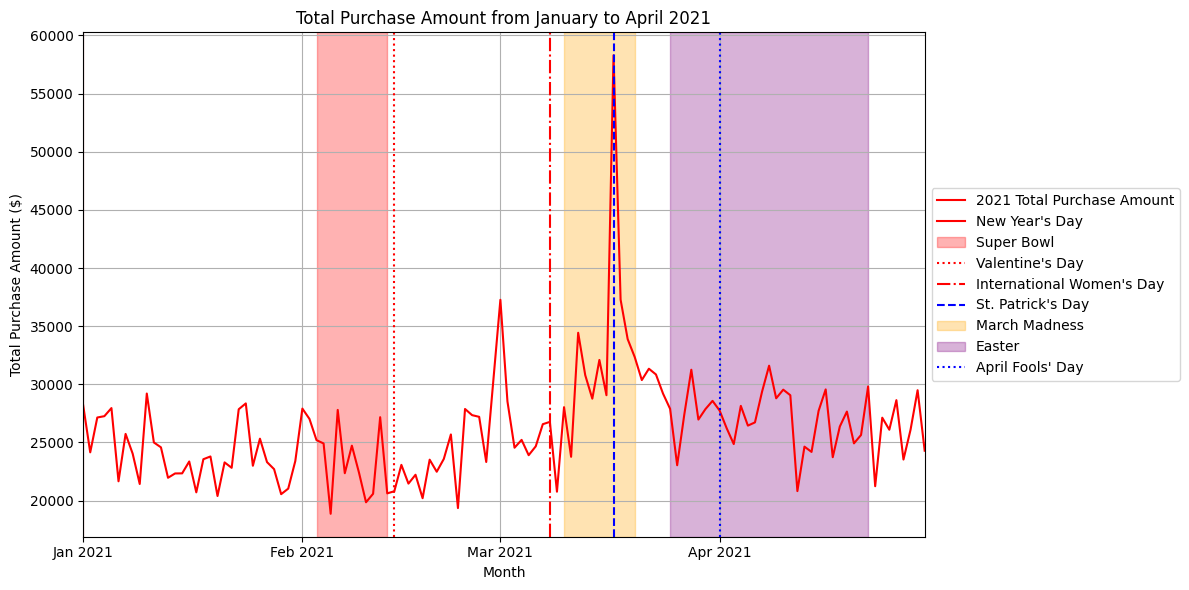

In [ ]:
# purchase amounts for January to April 2021
purchases_2021 = purchases[(purchases['year'] == 2021) & (purchases['day_of_year'] <= 120)]
purchases_2021['Total Purchase Amount'] = purchases_2021['Purchase Price Per Unit'] * purchases_2021['Quantity']
daily_purchase_amount = purchases_2021.groupby('day_of_year')['Total Purchase Amount'].sum()
daily_purchase_amount.index = pd.to_datetime(2021 * 1000 + daily_purchase_amount.index, format='%Y%j')

plt.figure(figsize=(12, 6))
plt.plot(daily_purchase_amount.index, daily_purchase_amount.values, label='2021 Total Purchase Amount', color='red')

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that varies by year
# 1 Jan: New Year's Day
plt.axvline(pd.to_datetime('2021-01-01'), color='red', linestyle='-', label="New Year's Day")
# 3-13 Feb: Super Bowl
plt.axvspan(pd.to_datetime('2021-02-03'), pd.to_datetime('2021-02-13'), color='red', alpha=0.3, label="Super Bowl")
# 14 Feb: Valentine's Day
plt.axvline(pd.to_datetime('2021-02-14'), color='red', linestyle=':', label="Valentine's Day")
# 8 Mar: International Women's Day
plt.axvline(pd.to_datetime('2021-03-08'), color='red', linestyle='-.', label="International Women's Day")
# 17 Mar: St. Patrick's Day
plt.axvline(pd.to_datetime('2021-03-17'), color='blue', linestyle='--', label="St. Patrick's Day")
# 10 - 20 Mar: March Madness
plt.axvspan(pd.to_datetime('2021-03-10'), pd.to_datetime('2021-03-20'), color='orange', alpha=0.3, label="March Madness")
# 25 Mar - 22 Apr: Easter
plt.axvspan(pd.to_datetime('2021-03-25'), pd.to_datetime('2021-04-22'), color='purple', alpha=0.3, label="Easter")
# 1 Apr: April Fools' Day
plt.axvline(pd.to_datetime('2021-04-01'), color='blue', linestyle=':', label="April Fools' Day")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-04-30'))
plt.title('Total Purchase Amount from January to April 2021')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount ($)')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### May to August 2021

<ipython-input-13-8ccdff17f565>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_may_august_2021['Total Purchase Amount'] = purchases_may_august_2021['Purchase Price Per Unit'] * purchases_may_august_2021['Quantity']


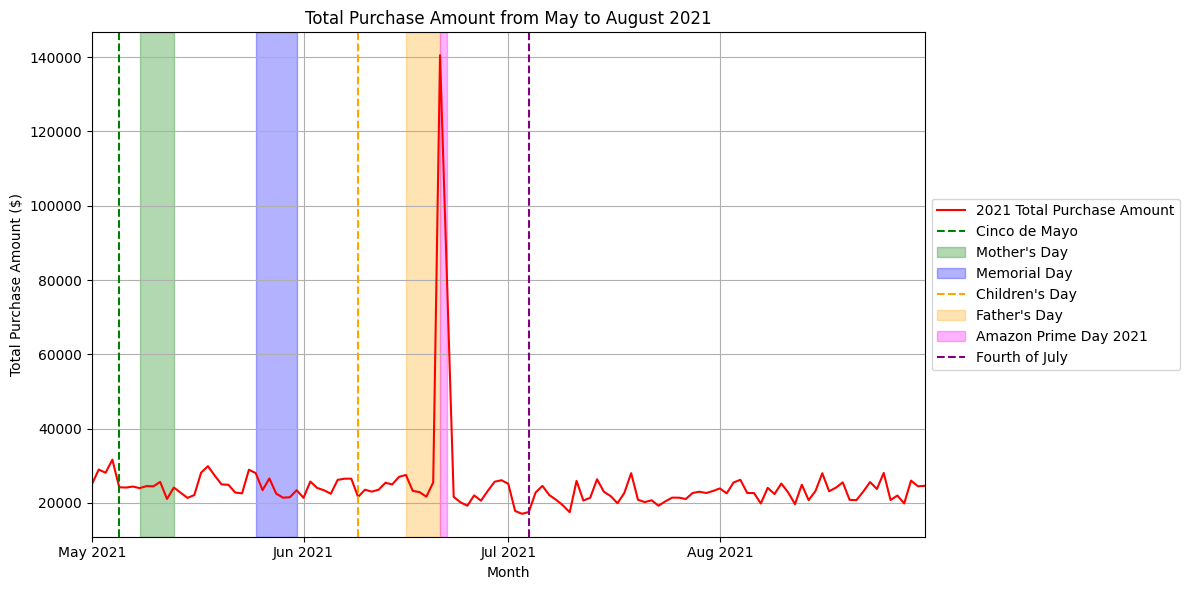

In [ ]:
# purchase amounts for May to August 2021
purchases_may_august_2021 = purchases[(purchases['year'] == 2021) & (purchases['day_of_year'] >= 121) & (purchases['day_of_year'] <= 243)]
purchases_may_august_2021['Total Purchase Amount'] = purchases_may_august_2021['Purchase Price Per Unit'] * purchases_may_august_2021['Quantity']
daily_purchase_amount_may_august = purchases_may_august_2021.groupby('day_of_year')['Total Purchase Amount'].sum()
daily_purchase_amount_may_august.index = pd.to_datetime(2021 * 1000 + daily_purchase_amount_may_august.index, format='%Y%j')

plt.figure(figsize=(12, 6))
plt.plot(daily_purchase_amount_may_august.index, daily_purchase_amount_may_august.values, label='2021 Total Purchase Amount', color='red')

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that vary by year
# 5 May: Cinco de Mayo
plt.axvline(pd.to_datetime('2021-05-05'), color='green', linestyle='--', label="Cinco de Mayo")
# 8 - 13 May: Mother's Day
plt.axvspan(pd.to_datetime('2021-05-08'), pd.to_datetime('2021-05-13'), color='green', alpha=0.3, label="Mother's Day")
# 25 - 31 May: Memorial Day
plt.axvspan(pd.to_datetime('2021-05-25'), pd.to_datetime('2021-05-31'), color='blue', alpha=0.3, label="Memorial Day")
# 9 June: Children's Day
plt.axvline(pd.to_datetime('2021-06-09'), color='orange', linestyle='--', label="Children's Day")
# 16 - 21 June: Father's Day
plt.axvspan(pd.to_datetime('2021-06-16'), pd.to_datetime('2021-06-21'), color='orange', alpha=0.3, label="Father's Day")
# 21 - 22 June: Amazon Prime Day 2021
plt.axvspan(pd.to_datetime('2021-06-21'), pd.to_datetime('2021-06-22'), color='magenta', alpha=0.3, label="Amazon Prime Day 2021")
# 4 July: Fourth of July
plt.axvline(pd.to_datetime('2021-07-04'), color='purple', linestyle='--', label="Fourth of July")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlim(pd.to_datetime('2021-05-01'), pd.to_datetime('2021-08-31'))
plt.title('Total Purchase Amount from May to August 2021')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount ($)')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


<ipython-input-14-53fc40488f16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_may_august_2021['Total Purchase Amount'] = purchases_may_august_2021['Purchase Price Per Unit'] * purchases_may_august_2021['Quantity']


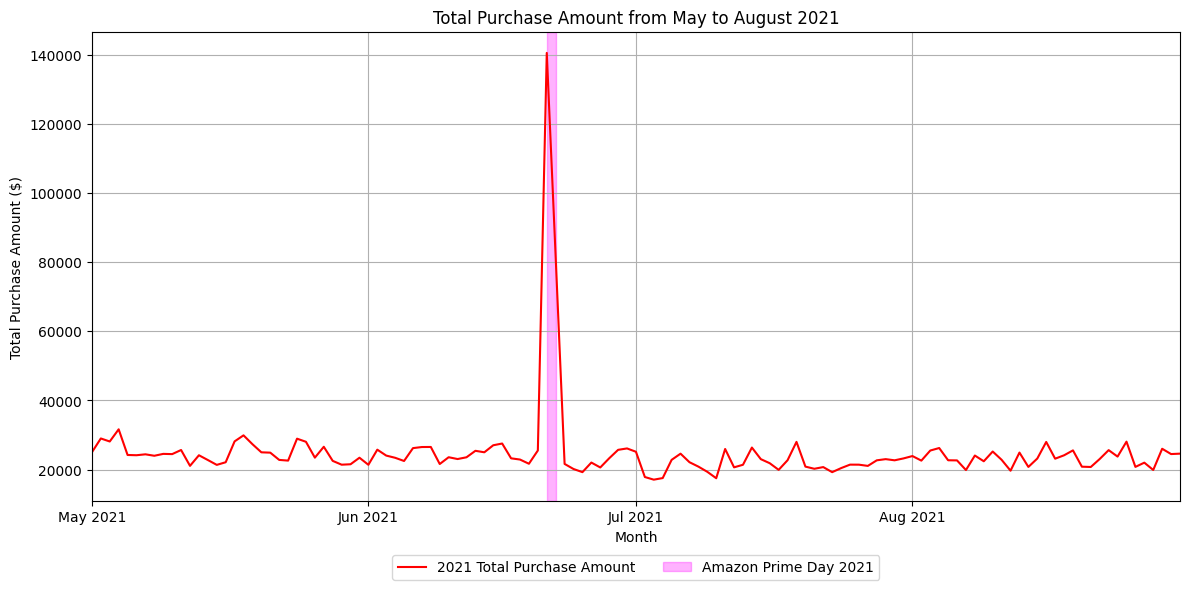

In [ ]:
# purchase amounts for May to August 2021 with focus on Amazon Prime Day
purchases_may_august_2021 = purchases[(purchases['year'] == 2021) & (purchases['day_of_year'] >= 121) & (purchases['day_of_year'] <= 243)]
purchases_may_august_2021['Total Purchase Amount'] = purchases_may_august_2021['Purchase Price Per Unit'] * purchases_may_august_2021['Quantity']
daily_purchase_amount_may_august = purchases_may_august_2021.groupby('day_of_year')['Total Purchase Amount'].sum()
daily_purchase_amount_may_august.index = pd.to_datetime(2021 * 1000 + daily_purchase_amount_may_august.index, format='%Y%j')

plt.figure(figsize=(12, 6))
plt.plot(daily_purchase_amount_may_august.index, daily_purchase_amount_may_august.values, label='2021 Total Purchase Amount', color='red')

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that vary by year
# 21 - 22 June: Amazon Prime Day 2021
plt.axvspan(pd.to_datetime('2021-06-21'), pd.to_datetime('2021-06-22'), color='magenta', alpha=0.3, label="Amazon Prime Day 2021")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlim(pd.to_datetime('2021-05-01'), pd.to_datetime('2021-08-31'))
plt.title('Total Purchase Amount from May to August 2021')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount ($)')
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.tight_layout()
plt.show()

### September to December 2021

<ipython-input-15-901e0063ed2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_sept_dec['Total Purchase Amount'] = purchases_sept_dec['Purchase Price Per Unit'] * purchases_sept_dec['Quantity']


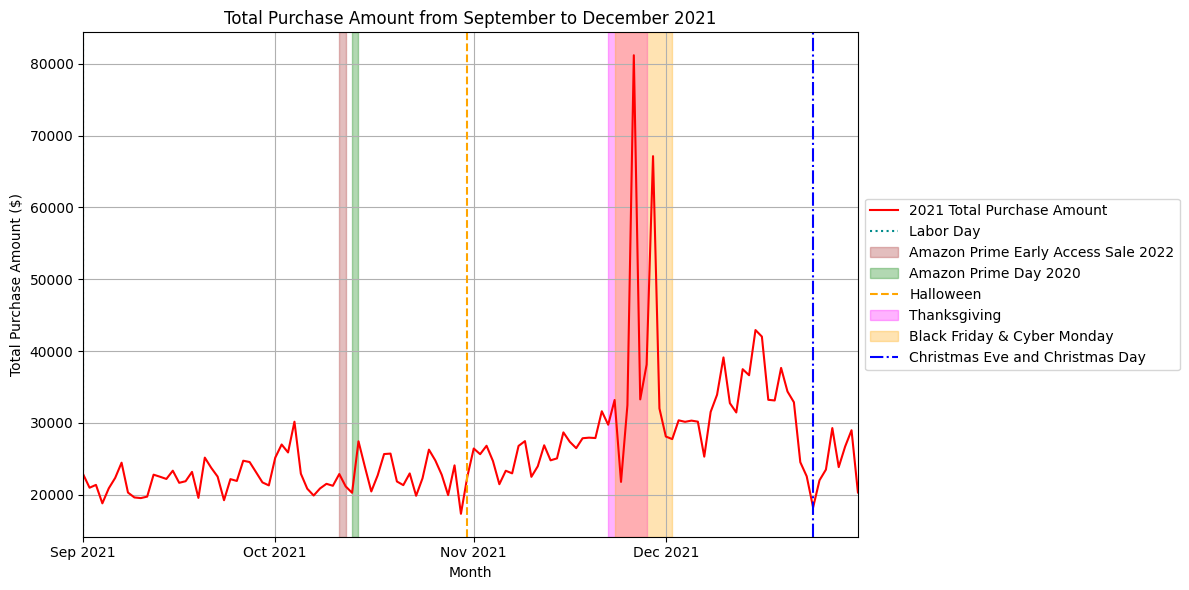

In [ ]:
# purchase amounts for September to December 2021
purchases_sept_dec = purchases[(purchases['year'] == 2021) & (purchases['day_of_year'] >= 244)]
purchases_sept_dec['Total Purchase Amount'] = purchases_sept_dec['Purchase Price Per Unit'] * purchases_sept_dec['Quantity']
daily_purchase_amount_sept_dec = purchases_sept_dec.groupby('day_of_year')['Total Purchase Amount'].sum()
daily_purchase_amount_sept_dec.index = pd.to_datetime(2021 * 1000 + daily_purchase_amount_sept_dec.index, format='%Y%j')

plt.figure(figsize=(12, 6))
plt.plot(daily_purchase_amount_sept_dec.index, daily_purchase_amount_sept_dec.values, label='2021 Total Purchase Amount', color='red')

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that vary by year
# 1 Sep: Labor Day
plt.axvline(pd.to_datetime('2021-09-01'), color='darkcyan', linestyle=':', label="Labor Day")
# 11 - 12 Oct: Amazon Prime Early Access Sale 2022
plt.axvspan(pd.to_datetime('2021-10-11'), pd.to_datetime('2021-10-12'), color='brown', alpha=0.3, label="Amazon Prime Early Access Sale 2022")
# 13 - 14 Oct: Amazon Prime Day 2020
plt.axvspan(pd.to_datetime('2021-10-13'), pd.to_datetime('2021-10-14'), color='green', alpha=0.3, label="Amazon Prime Day 2020")
# 31 Oct: Halloween
plt.axvline(pd.to_datetime('2021-10-31'), color='orange', linestyle='--', label="Halloween")
# 22-28 Nov: Thanksgiving
plt.axvspan(pd.to_datetime('2021-11-22'), pd.to_datetime('2021-11-28'), color='magenta', alpha=0.3, label="Thanksgiving")
# 23 Nov - 2nd Dec: Black Friday & Cyber Monday
plt.axvspan(pd.to_datetime('2021-11-23'), pd.to_datetime('2021-12-02'), color='orange', alpha=0.3, label="Black Friday & Cyber Monday")
# 24 - 25 Dec: Christmas Eve & Christmas Day
plt.axvline(pd.to_datetime('2021-12-24'), color='blue', linestyle='-.', label="Christmas Eve and Christmas Day")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlim(pd.to_datetime('2021-09-01'), pd.to_datetime('2021-12-31'))
plt.title('Total Purchase Amount from September to December 2021')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount ($)')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


<ipython-input-16-18d700304e98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_sept_dec['Total Purchase Amount'] = purchases_sept_dec['Purchase Price Per Unit'] * purchases_sept_dec['Quantity']


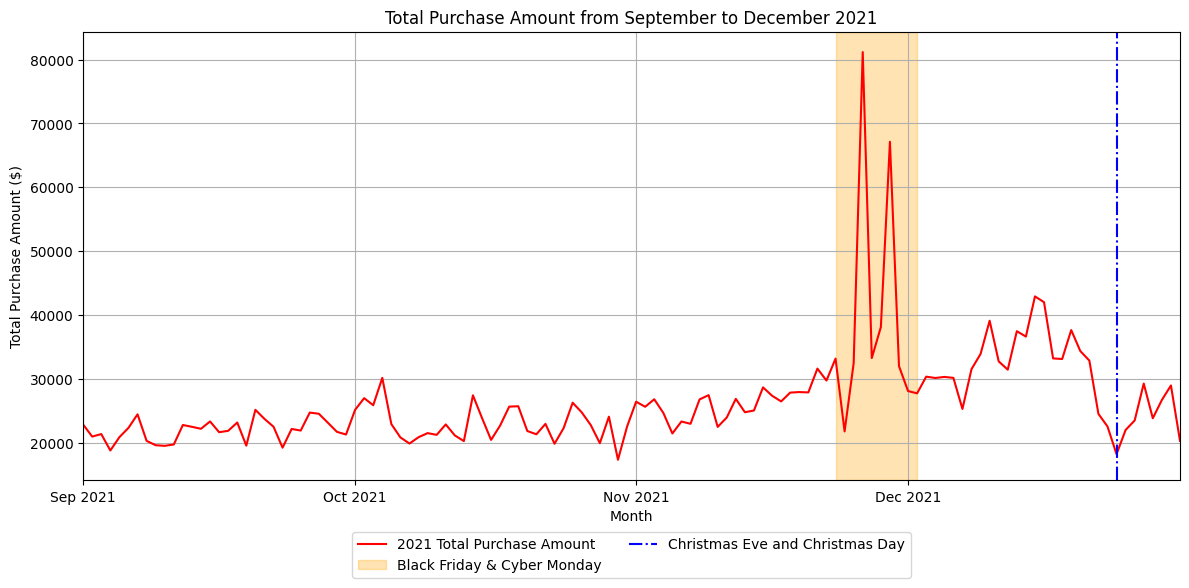

In [ ]:
# purchase amounts for September to December 2021 with focus on black friday and cyber monday
purchases_sept_dec = purchases[(purchases['year'] == 2021) & (purchases['day_of_year'] >= 244)]
purchases_sept_dec['Total Purchase Amount'] = purchases_sept_dec['Purchase Price Per Unit'] * purchases_sept_dec['Quantity']
daily_purchase_amount_sept_dec = purchases_sept_dec.groupby('day_of_year')['Total Purchase Amount'].sum()
daily_purchase_amount_sept_dec.index = pd.to_datetime(2021 * 1000 + daily_purchase_amount_sept_dec.index, format='%Y%j')

plt.figure(figsize=(12, 6))
plt.plot(daily_purchase_amount_sept_dec.index, daily_purchase_amount_sept_dec.values, label='2021 Total Purchase Amount', color='red')

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that vary by year
# 23 Nov - 2nd Dec: Black Friday & Cyber Monday
plt.axvspan(pd.to_datetime('2021-11-23'), pd.to_datetime('2021-12-02'), color='orange', alpha=0.3, label="Black Friday & Cyber Monday")
# 24 - 25 Dec: Christmas Eve & Christmas Day
plt.axvline(pd.to_datetime('2021-12-24'), color='blue', linestyle='-.', label="Christmas Eve and Christmas Day")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlim(pd.to_datetime('2021-09-01'), pd.to_datetime('2021-12-31'))
plt.title('Total Purchase Amount from September to December 2021')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount ($)')
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.tight_layout()
plt.show()


### Conclusion

The plots for total purchase amounts is similar to the plots for number of purchases. There was a concern that there were many purchases but of very small monetary amounts, however this shows that it is not the case.

Can conclude that Amazon Prime Day and Black Friday/ Cyber Monday promotional campaigns are most positively impactful on sales. This can be seen by the spikes in total purchase amounts during those two sales periods. It is further validated by the increased number of sales transactions as shown in 2.2